In [2]:
import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv('2019.csv')

In [85]:
df.head(6)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [89]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [91]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [97]:
data = {'Country or region': ['Finland', 'Denmark', 'Iceland', 'Norway', 'Sweden', 'Germany']}

df['Country or region'] = le.fit_transform(df['Country or region'])



In [111]:
df['Country or region'].value_counts()

Country or region
43     1
151    1
68     1
12     1
30     1
      ..
75     1
127    1
41     1
66     1
128    1
Name: count, Length: 156, dtype: int64

In [113]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,43,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,36,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,105,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,57,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,98,7.488,1.396,1.522,0.999,0.557,0.322,0.298


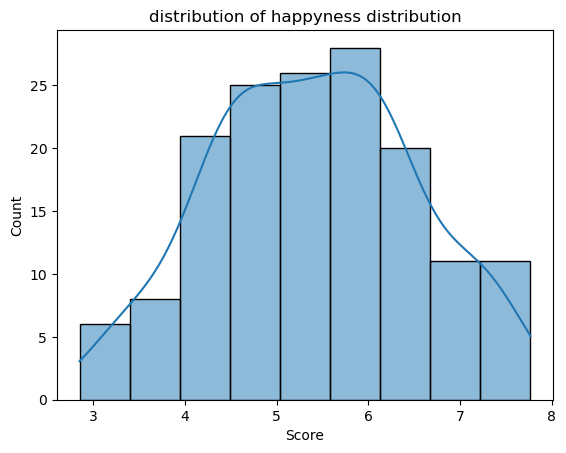

In [115]:
sns.histplot(df['Score'],kde=True)
plt.title('distribution of happyness distribution')
plt.show()

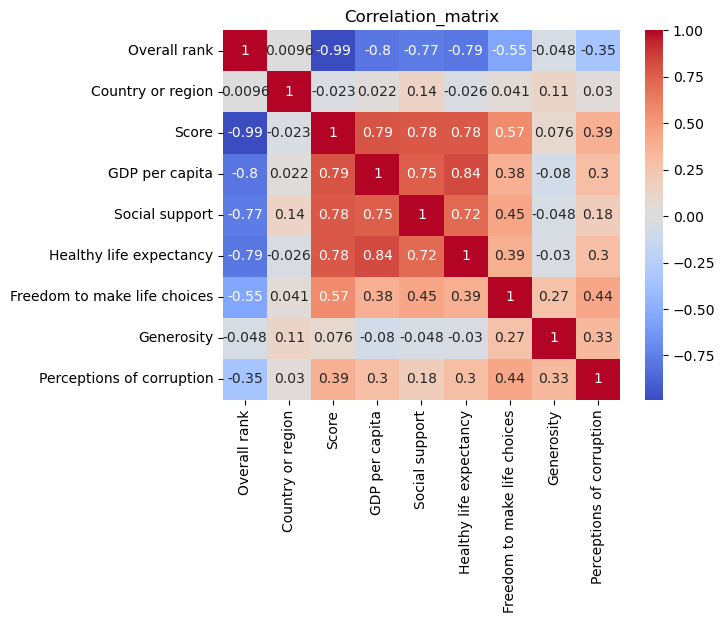

In [122]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation_matrix')
plt.show()

In [124]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [128]:
x= df[['GDP per capita','Perceptions of corruption','Generosity','Social support','Healthy life expectancy','Freedom to make life choices']]
y= df['Score']

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [134]:
X_scaled = scaler.fit_transform(x)

In [138]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [190]:
x_test

array([[ 0.47053038, -1.13124962, -1.09370862,  1.0199677 ,  0.37189821,
        -0.57110421],
       [ 0.2489296 , -0.75983513, -0.50391612,  0.58406386,  0.53349146,
        -0.77414354],
       [ 0.10791093, -0.77044698,  0.52822076,  1.08032362, -0.24132746,
        -0.52909608],
       [ 0.2766297 , -0.1019009 , -0.75668434,  0.64441978,  0.22273521,
         0.73114803],
       [-1.4458127 ,  0.02544121, -0.08263576, -0.51240196, -1.43048806,
        -0.96318016],
       [ 0.95905936, -0.33536143, -0.33540398,  0.92272761,  1.39532214,
        -0.21403505],
       [-0.23204481,  0.59848071,  1.95004197,  0.37617126, -0.50236272,
         0.45109379],
       [-0.21441748, -1.06757857,  0.02268433,  0.6075356 ,  0.05699854,
        -1.50228458],
       [-0.41335454, -0.39903249, -0.39859603,  0.45999892,  0.52106121,
         1.05321042],
       [-0.37809987, -0.27169038,  0.15960044, -1.48815594, -0.56865738,
         0.73814939],
       [ 0.91625012, -0.79167066, -1.46232894,  0.

In [192]:
from sklearn.linear_model import LinearRegression

In [194]:
lr = LinearRegression()

In [196]:
lr.fit(x_train,y_train)

LinearRegression()

In [198]:
from sklearn.metrics import mean_squared_error,r2_score

In [200]:
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error:",mse)
print(f"R2 Score:",r2)

Mean Squared Error: 0.4078692040701687
R2 Score: 0.5831750841034309


In [202]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rf_model= RandomForestClassifier(n_estimators =100, random_state =42)


In [216]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(x_train, y_train)


RandomForestRegressor()

In [218]:
y_pred_rf = rf_model.predict(x_test)

In [220]:
mse_rf = mean_squared_error(y_test,y_pred)
r2_score_rf = r2_score(y_test,y_pred)

print("Mean Squared Error rf:",mse_rf)
print("R2_score_rf:",r2_score_rf)

Mean Squared Error rf: 0.4078692040701687
R2_score_rf: 0.5831750841034309


In [222]:
from sklearn.model_selection import GridSearchCV

In [226]:
param_grid = { 'n_estimators':[50,100,200],'max_depth':[10,20,None]}

grid_search = GridSearchCV(RandomForestRegressor(),param_grid,cv =5)

grid_search.fit(x_train,y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R-Squared:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best R-Squared: 0.8233757102015671


In [230]:
y_pred_final = grid_search.best_estimator_.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print(f"Final Mean Squared Error: {final_mse}")
print(f"Final R-Squared: {final_r2}")

Final Mean Squared Error: 0.34203967260813234
Final R-Squared: 0.6504500552004232


In [ ]:
plt.scatter(y_test,y_pred_final)
plt.xlabel('Acctual Happyness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual VS Predicted Happiness